In [ ]:
!pip install segmentation_models_pytorch

In [1]:
import torch
from torchvision import transforms as T
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2
import csv

In [45]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
model = torch.load('Unet-Mobilenet.pt')
model.eval()
colors = {}
with open('class_dict_seg.csv') as csvfile:
    code_reader = csv.reader(csvfile, delimiter=',')
    headers = next(code_reader, None)
    for i,row in enumerate(code_reader):
        colors[i] = ((int(row[1]),int(row[2]),int(row[3])))

In [41]:
def inf(img):
    t = T.Compose([T.ToTensor(), T.Normalize(mean, std)])
    img = t(img)
#     img_patches = img.unfold(1, 512, 284).unfold(2, 768, 654) 
#     img_patches  = img_patches.contiguous().view(3,-1, 512, 768) 
#     img_patches = img_patches.permute(1,0,2,3)

    with torch.no_grad():
        output = model(img.unsqueeze(0).cuda()).cpu()
#         output = model(img_patches.to('cuda')).cpu()
    return img_patches,output
def maskToCV(mask,colors):
    cv_mask = np.zeros((mask.shape[0],mask.shape[1],3),dtype=np.uint8)
    for label,color in colors.items():
        cv_mask[mask==label] = color
    return cv_mask

In [ ]:
with torch.no_grad():
    output = model(empty.to('cuda')).cpu()
masked = torch.argmax()    
masked = model(empty)

In [66]:
%%time
img_patches, output = inf(img)

CPU times: user 94 ms, sys: 57 ms, total: 151 ms
Wall time: 113 ms


In [67]:
img = cv2.imread("/home/ad/stanford/1.png")
# img = cv2.resize(img, (768,512))
img = img[:1024,:1280]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_patches, output = inf(img)
masked = torch.argmax(output, dim=1)
cv_mask = maskToCV(masked[0],colors)

In [69]:
cv_mask = maskToCV(masked[0],colors)

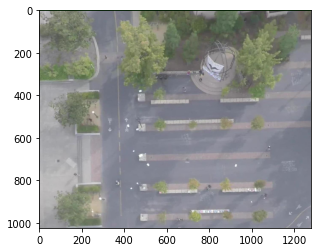

In [68]:
plt.imshow(img)

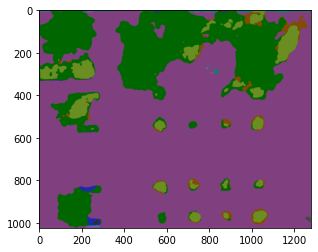

In [70]:
plt.imshow(cv_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


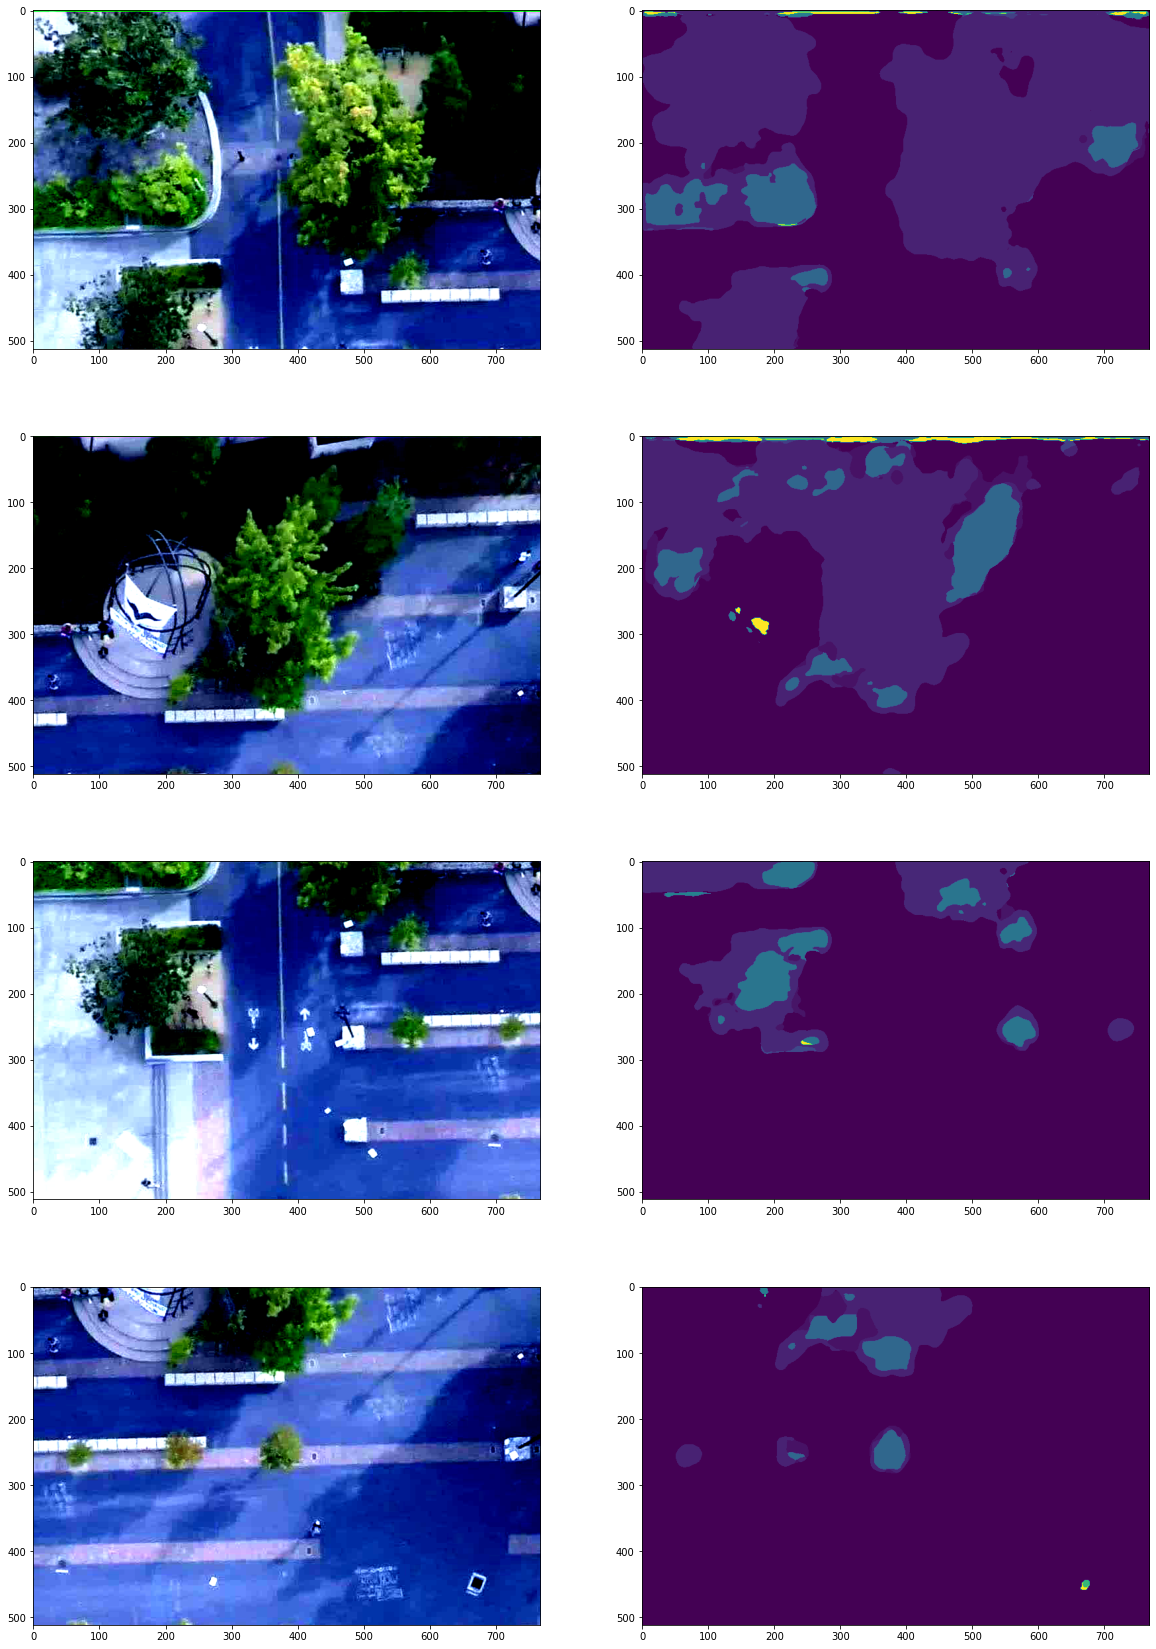

In [25]:
fig, ax = plt.subplots(4,2, figsize=(20,30))
for i in range(4):
    open_cv_image = np.array(img_patches[i].permute(1,2,0)) 
#     open_cv_image = open_cv_image[:, :, ::-1].copy() 
#     open_cv_image = open_cv_image[:, :, ::-1].copy() 
    ax[i,0].imshow(open_cv_image)
#     ax[i,0].imshow(img_patches[i].permute(1,2,0))
    ax[i,1].imshow(masked[i])

In [ ]:
fig, (ax1,  ax3) = plt.subplots(1,2, figsize=(20,10))
# image = image.squeeze(0)
# image = image.cpu()
image = image.permute(1,2,0)
ax1.imshow(image)
ax1.set_title('Picture');

# image = image.squeeze(0)

ax3.imshow(masked.cpu())
# ax3.set_title('UNet-MobileNet | mIoU {:.3f}'.format(score3))
# ax3.set_axis_off()